In [81]:
#Import proper libraries and 
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [2]:
csvpath = Path('C:/Users/Optiplex7040/Downloads/Portfolio_project/Custom-Portfolio-Project/Resources/whale_returns.csv')

In [46]:
#Read in whale return
whales_dataframe = pd.read_csv(csvpath, index_col='Date', parse_dates=True)
whales_dataframe.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [47]:
#Check for nulls
whales_dataframe.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [48]:
#Determine number of nulls 
whales_dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [49]:
#Drop nulls
whales_dataframe.dropna(inplace=True)
whales_dataframe

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [50]:
#Recount nulls
whales_dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [51]:
#Read in algo returns
algo_data_path = Path('C:/Users/Optiplex7040/Downloads/Portfolio_project/Custom-Portfolio-Project/Resources/algo_returns.csv')
algo_dataframe = pd.read_csv(algo_data_path, index_col='Date', parse_dates=True)

In [52]:
algo_dataframe.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [53]:
#Check for nulls
algo_dataframe.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [54]:
#Drop nulls
algo_dataframe = algo_dataframe.dropna().copy()

In [55]:
#Null recheck
algo_dataframe.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [56]:
#Read in SP500 closing prices
sp500_data_path = Path('C:/Users/Optiplex7040/Downloads/Portfolio_project/Custom-Portfolio-Project/Resources/sp500_history.csv')
sp500_dataframe = pd.read_csv(sp500_data_path, index_col='Date', parse_dates=True)
sp500_dataframe.head()

C:\Users\Optiplex7040\AppData\Local\Temp\ipykernel_8536\2135114147.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_dataframe = pd.read_csv(sp500_data_path, index_col='Date', parse_dates=True)


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [57]:
#Cheak data types
sp500_dataframe.dtypes

Close    object
dtype: object

In [58]:
#Fix data types
sp500_dataframe["Close"] = sp500_dataframe["Close"].str.replace("$", "")
sp500_dataframe["Close"] = sp500_dataframe["Close"].astype("float")
sp500_dataframe.dtypes

Close    float64
dtype: object

In [59]:
#Calculate daily return
sp500_daily_returns = sp500_dataframe.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [60]:
#Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna().copy()
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [61]:
# Rename `Close` Column to be specific to this portfolio
columns = ["sp500.Close"]
sp500_daily_returns.columns = columns
sp500_daily_returns.head()

,sp500.Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [62]:
#Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns
returns_dataframe = pd.concat([whales_dataframe, algo_dataframe, sp500_daily_returns], axis='columns', join='inner')
returns_dataframe.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500.Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


<Axes: xlabel='Date'>

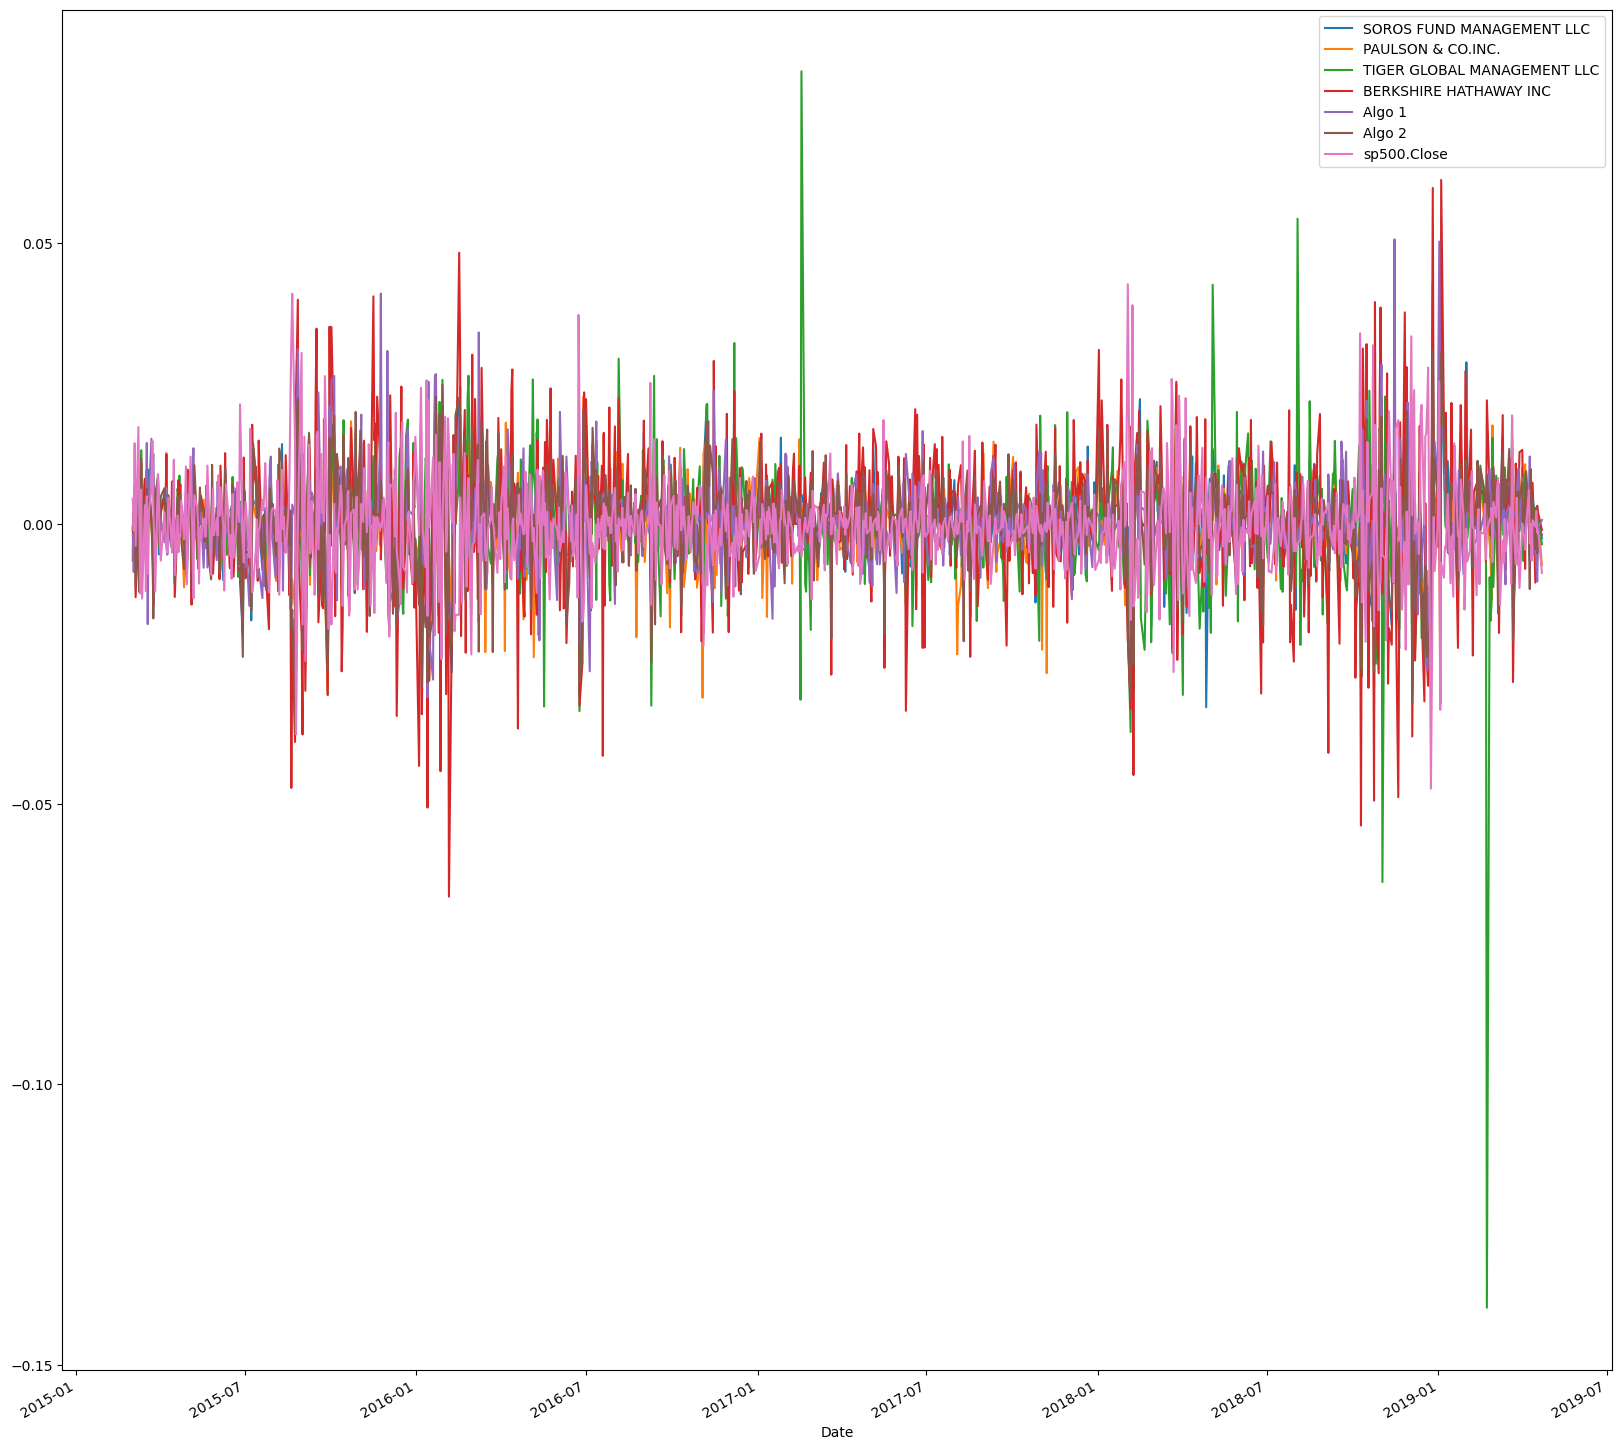

In [63]:
#Plot daily returns
returns_dataframe.plot(figsize=(20,20))

<Axes: xlabel='Date'>

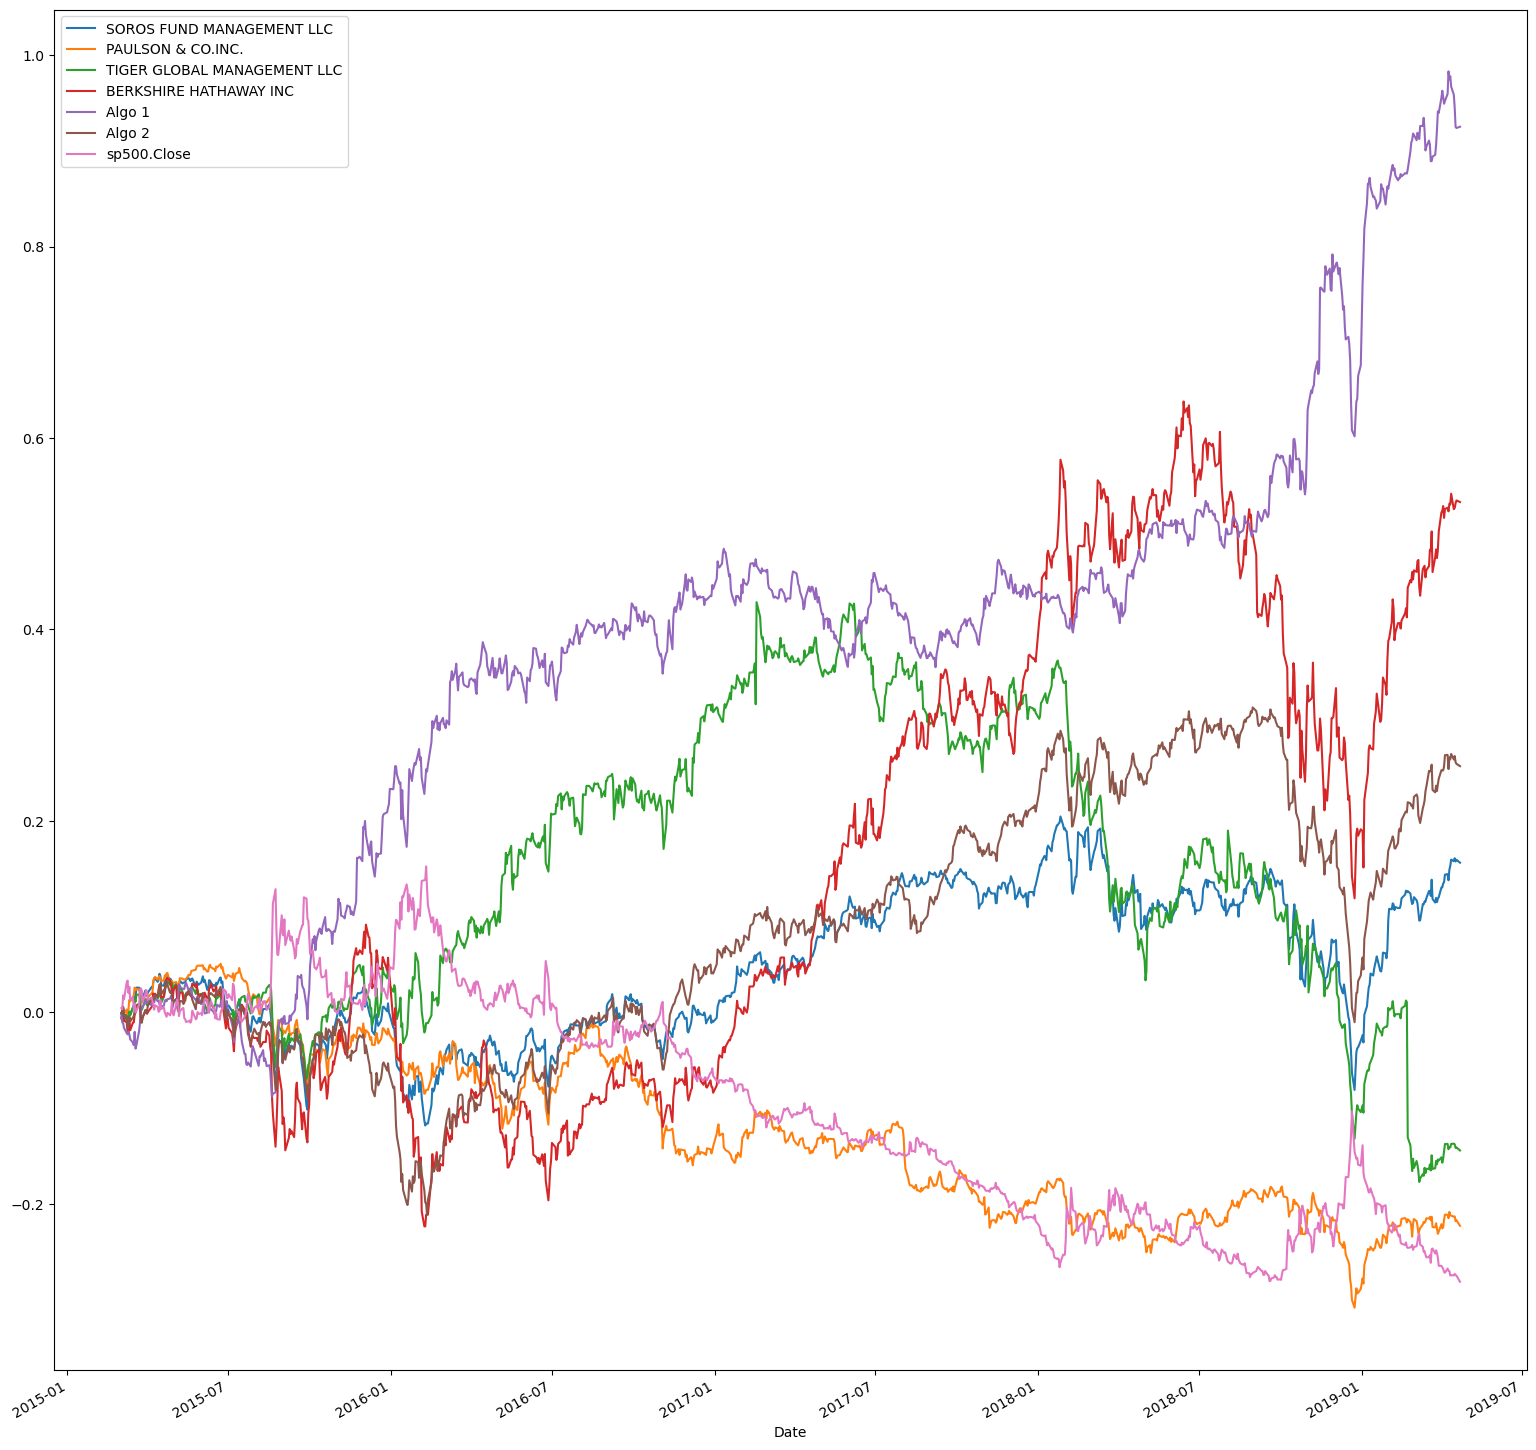

In [69]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + returns_dataframe).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(19,20))

In [65]:
# Box plot to visually show risk
cumulative_returns.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'sp500.Close'],
      dtype='object')

<Axes: >

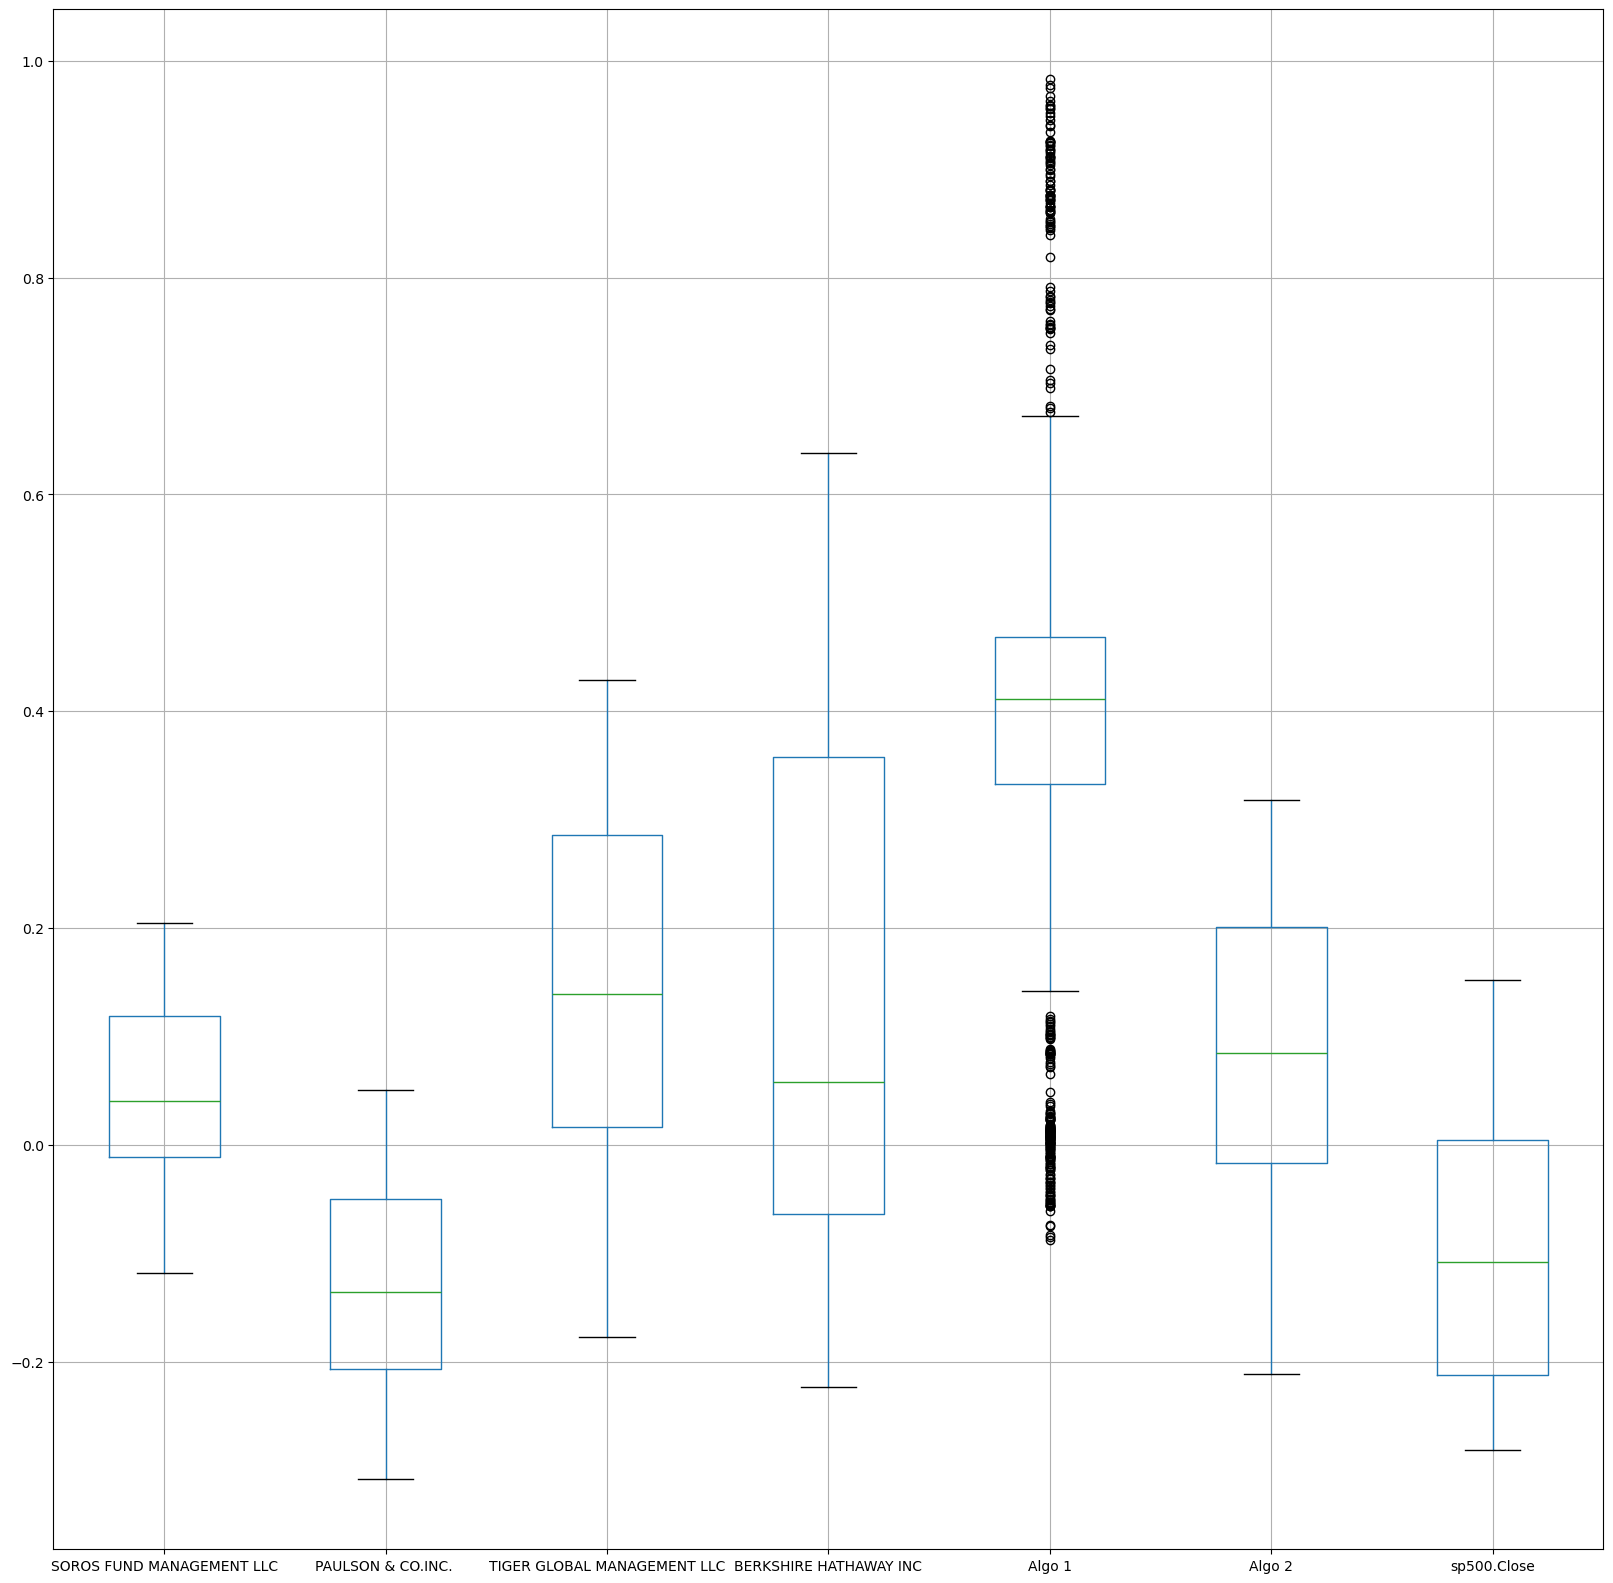

In [72]:
cumulative_returns.boxplot(column=['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'sp500.Close'],  figsize=(20,20))

In [73]:
# Calculate the daily standard deviations of all portfolios
daily_std = cumulative_returns.std()
daily_std.head()

SOROS FUND MANAGEMENT LLC      0.073187
PAULSON & CO.INC.              0.088447
TIGER GLOBAL MANAGEMENT LLC    0.149652
BERKSHIRE HATHAWAY INC         0.241382
Algo 1                         0.231772
dtype: float64

In [75]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = sp500_daily_returns.std()
# Determine which portfolios are riskier than the S&P 500
volatility = cumulative_returns.std() * np.sqrt(252)
volatility.sort_values()

SOROS FUND MANAGEMENT LLC      1.161806
PAULSON & CO.INC.              1.404053
sp500.Close                    1.823124
Algo 2                         2.089756
TIGER GLOBAL MANAGEMENT LLC    2.375658
Algo 1                         3.679263
BERKSHIRE HATHAWAY INC         3.831820
dtype: float64

In [76]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = cumulative_returns.std() * np.sqrt(252)
annualized_std.sort_values()

SOROS FUND MANAGEMENT LLC      1.161806
PAULSON & CO.INC.              1.404053
sp500.Close                    1.823124
Algo 2                         2.089756
TIGER GLOBAL MANAGEMENT LLC    2.375658
Algo 1                         3.679263
BERKSHIRE HATHAWAY INC         3.831820
dtype: float64

<Axes: xlabel='Date'>

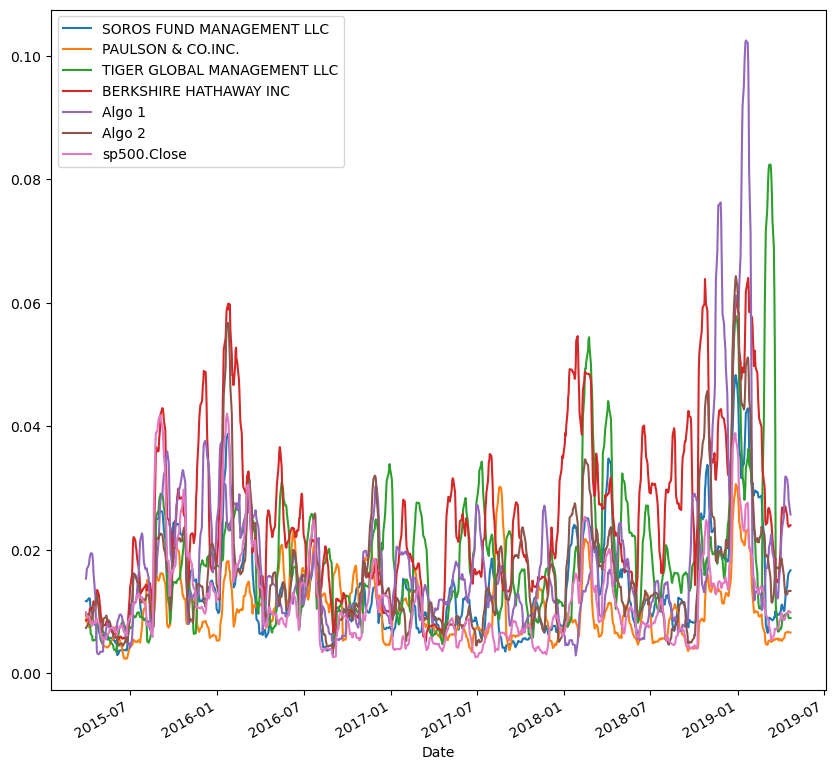

In [79]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = cumulative_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(10,10))

<Axes: >

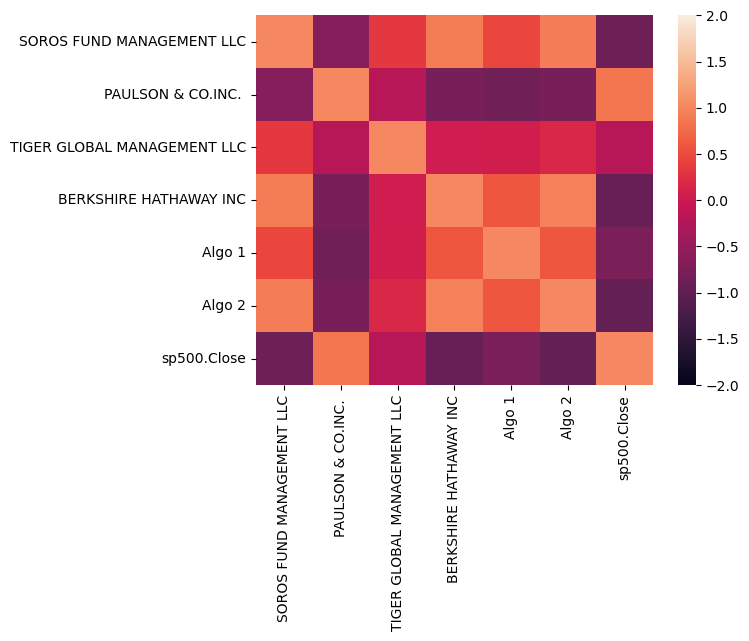

In [83]:
# Calculate the correlation
correlations = cumulative_returns.corr()
correlations
# Display de correlation matrix
sns.heatmap(correlations, vmin=-2, vmax=2)

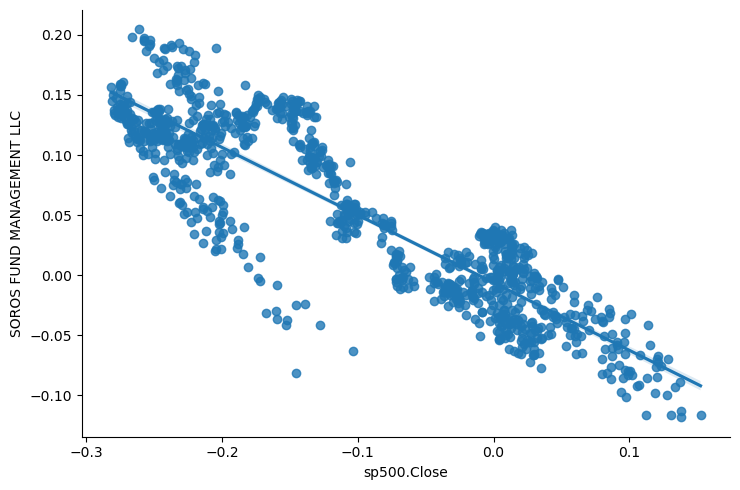

In [89]:
# Calculate covariance of a single portfolio
soros_covariance = cumulative_returns['SOROS FUND MANAGEMENT LLC'].cov(cumulative_returns['sp500.Close'])
# Calculate variance of S&P 500
sp500_variance = cumulative_returns['sp500.Close'].var()
# Computing beta
soros_beta = soros_covariance / sp500_variance
# Plot beta trend
sns.lmplot(x='sp500.Close', y='SOROS FUND MANAGEMENT LLC', data=cumulative_returns, aspect=1.5, fit_reg=True)

<Axes: xlabel='Date'>

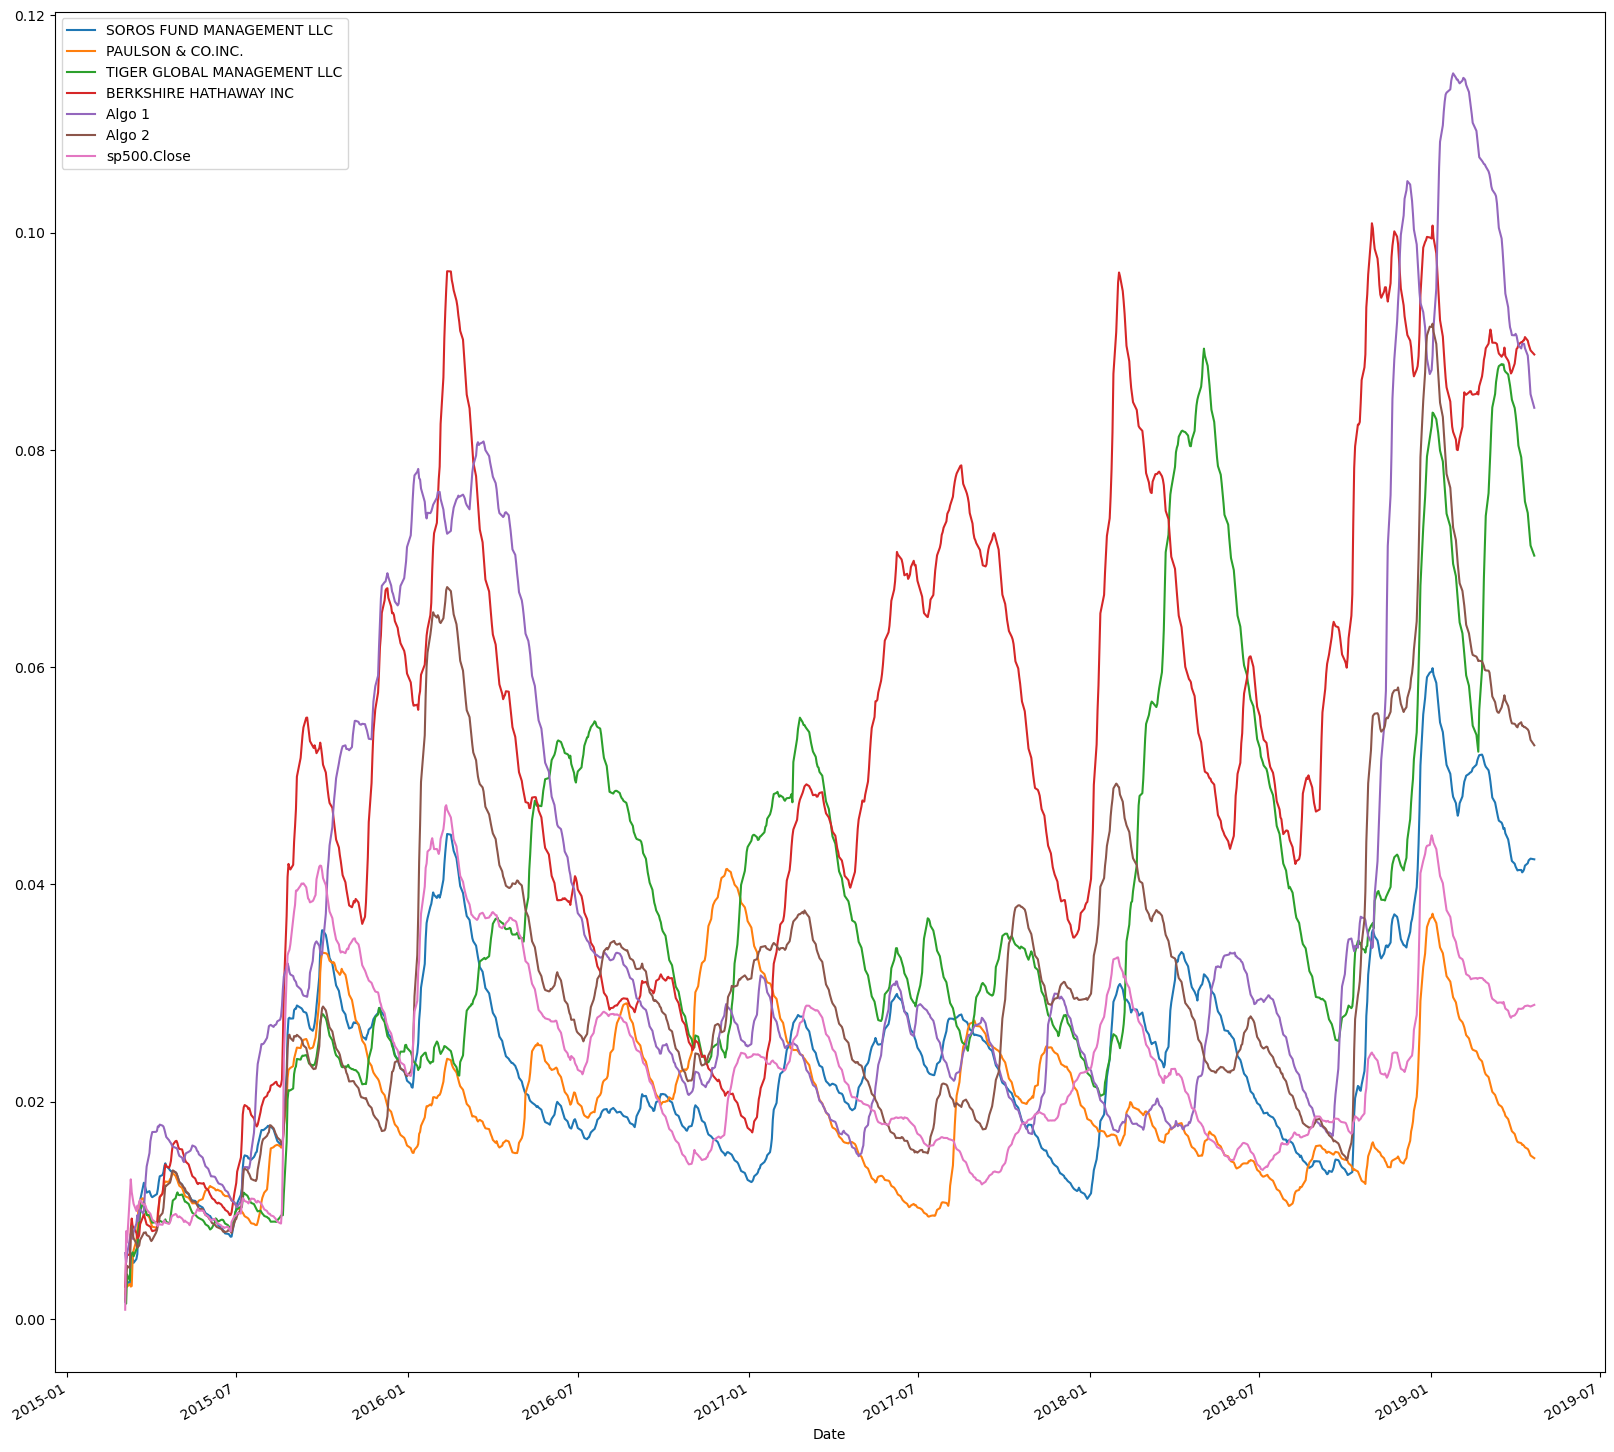

In [90]:
# Use `ewm` to calculate the rolling window
rolling_ewm = cumulative_returns.ewm(halflife=21).std()
rolling_ewm.plot(figsize=(20,20))

In [91]:
# Annualized Sharpe Ratios
sharpe_ratios = (cumulative_returns.mean()  * 252) / (daily_std * np.sqrt(252))

<Axes: title={'center': 'Sharpe Ratios'}>

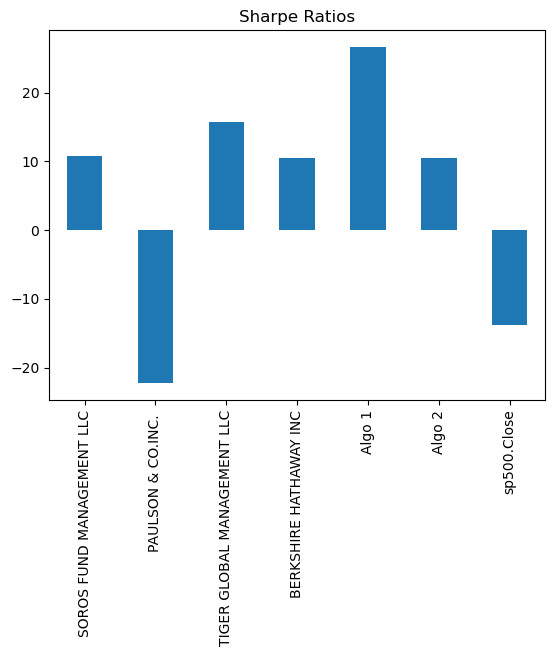

In [93]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [95]:
# Reading data for Custom Portfolio
appl_path = Path('C:/Users/Optiplex7040/Downloads/Portfolio_project/Custom-Portfolio-Project/Resources/aapl_historical.csv')
appl_dataframe = pd.read_csv(appl_path, index_col='Trade DATE', parse_dates=True)
appl_dataframe.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [96]:
appl_dataframe.drop(columns = ["Symbol"], inplace=True)

In [97]:
appl_dataframe.head()

,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [98]:
cost_path = Path('C:/Users/Optiplex7040/Downloads/Portfolio_project/Custom-Portfolio-Project/Resources/cost_historical.csv')
cost_dataframe = pd.read_csv(cost_path, index_col='Trade DATE', parse_dates=True)
cost_dataframe.drop(columns = ["Symbol"], inplace=True)
cost_dataframe.head()

,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [99]:
goog_path = Path('C:/Users/Optiplex7040/Downloads/Portfolio_project/Custom-Portfolio-Project/Resources/goog_historical.csv')
goog_dataframe = pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True)
goog_dataframe.drop(columns = ["Symbol"], inplace=True)
goog_dataframe.head()

,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [100]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([appl_dataframe, cost_dataframe, goog_dataframe], axis='columns', join='inner')
my_portfolio.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [101]:
# Reset Date index
my_portfolio.reset_index("Trade DATE")
my_portfolio.sort_index()
my_portfolio.head()

,NOCP,NOCP,NOCP
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [102]:
# Reorganize portfolio data by having a column per symbol
columns = ['Appl', 'Cost', 'Goog']
my_portfolio.columns = columns
my_portfolio.head()

,Appl,Cost,Goog
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [103]:
# Calculate daily returns
my_portfolio_returns = my_portfolio.pct_change()
# Drop NAs
my_portfolio_returns = my_portfolio.pct_change().dropna()
# Display sample data
my_portfolio_returns.head()

,Appl,Cost,Goog
Trade DATE,,,
2019-05-08,0.010861,-0.008749,0.003347
2019-05-07,-0.000197,-0.004806,0.006714
2019-05-06,0.027704,0.016862,0.013023
2019-05-03,0.015685,0.001597,-0.003355
2019-05-02,-0.012279,-0.007890,-0.019226


In [105]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = my_portfolio_returns.dot(weights)
# Display sample data
my_portfolio_returns.head()

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

In [107]:
# Join your returns DataFrame to the original returns DataFrame
joined_dataframe = pd.concat([my_portfolio_returns, cumulative_returns], axis="columns", join="inner")
joined_dataframe.head()

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500.Close
2019-04-22,-0.011812,0.156280,-0.223061,-0.144348,0.533046,0.925124,0.257151,-0.281524
2019-04-18,-0.001148,0.159278,-0.217322,-0.141222,0.534716,0.923823,0.259590,-0.275171
2019-04-17,-0.001541,0.157602,-0.218277,-0.141721,0.531781,0.924954,0.261140,-0.274438
2019-04-16,-0.009149,0.160965,-0.213189,-0.137920,0.526861,0.944990,0.267768,-0.273292
2019-04-15,-0.000326,0.157839,-0.213494,-0.137203,0.525584,0.958591,0.264103,-0.274944


In [108]:
joined_dataframe.columns

Index([                            0,   'SOROS FUND MANAGEMENT LLC',
                'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC',
            'BERKSHIRE HATHAWAY INC',                      'Algo 1',
                            'Algo 2',                 'sp500.Close'],
      dtype='object')

In [110]:
columns = ['MY PORTFOLIO', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'ALGO 1', 'ALGO 2', 'SP500']
joined_dataframe.columns = columns
joined_dataframe.head()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGO 1,ALGO 2,SP500
2019-04-22,-0.011812,0.156280,-0.223061,-0.144348,0.533046,0.925124,0.257151,-0.281524
2019-04-18,-0.001148,0.159278,-0.217322,-0.141222,0.534716,0.923823,0.259590,-0.275171
2019-04-17,-0.001541,0.157602,-0.218277,-0.141721,0.531781,0.924954,0.261140,-0.274438
2019-04-16,-0.009149,0.160965,-0.213189,-0.137920,0.526861,0.944990,0.267768,-0.273292
2019-04-15,-0.000326,0.157839,-0.213494,-0.137203,0.525584,0.958591,0.264103,-0.274944


In [111]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_dataframe.dropna()

,MY PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGO 1,ALGO 2,SP500
2019-04-22,-0.011812,0.156280,-0.223061,-0.144348,0.533046,0.925124,0.257151,-0.281524
2019-04-18,-0.001148,0.159278,-0.217322,-0.141222,0.534716,0.923823,0.259590,-0.275171
2019-04-17,-0.001541,0.157602,-0.218277,-0.141721,0.531781,0.924954,0.261140,-0.274438
2019-04-16,-0.009149,0.160965,-0.213189,-0.137920,0.526861,0.944990,0.267768,-0.273292
2019-04-15,-0.000326,0.157839,-0.213494,-0.137203,0.525584,0.958591,0.264103,-0.274944
...,...,...,...,...,...,...,...,...
2018-05-17,0.006112,0.115080,-0.231722,0.104303,0.516456,0.496091,0.278905,-0.223073
2018-05-16,0.001618,0.117265,-0.233656,0.111268,0.524291,0.506561,0.272283,-0.225118
2018-05-15,-0.009283,0.107698,-0.238412,0.105212,0.517749,0.510074,0.268047,-0.225781
2018-05-14,0.010216,0.108502,-0.237338,0.108748,0.540246,0.511789,0.269493,-0.222637


In [113]:
# Calculate the annualized `std`
annualized_std = joined_dataframe.std()* np.sqrt(252)
annualized_std.sort_values()

MY PORTFOLIO                   0.213137
PAULSON & CO.INC.              0.363691
SP500                          0.501462
SOROS FUND MANAGEMENT LLC      0.736620
ALGO 2                         1.193950
TIGER GLOBAL MANAGEMENT LLC    1.779544
BERKSHIRE HATHAWAY INC         1.950982
ALGO 1                         2.697302
dtype: float64

<Axes: >

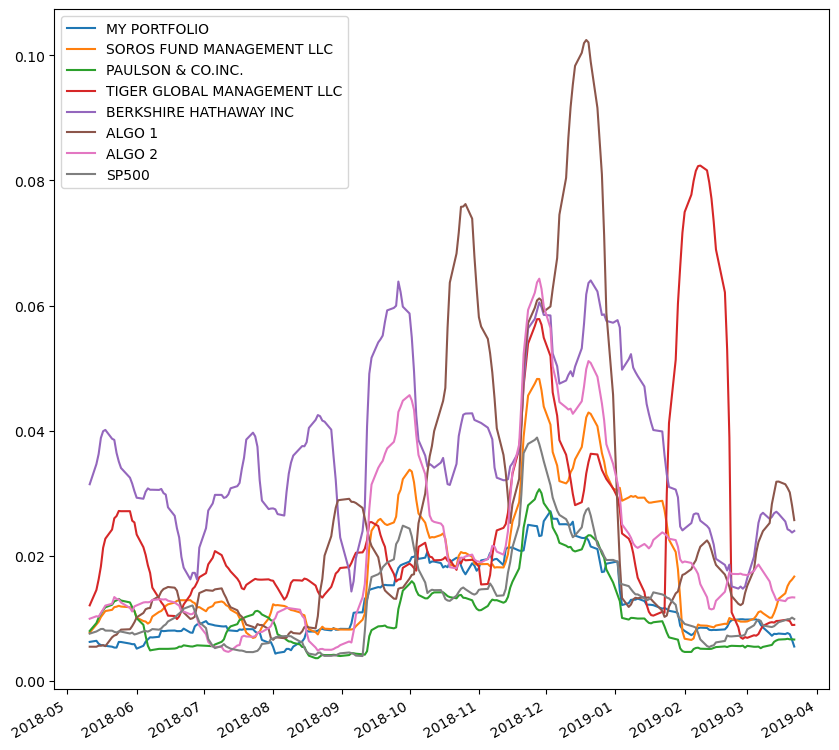

In [115]:
# Calculate rolling standard deviation
rolling_std_21 = joined_dataframe.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std_21.plot(figsize=(10,10))

<Axes: >

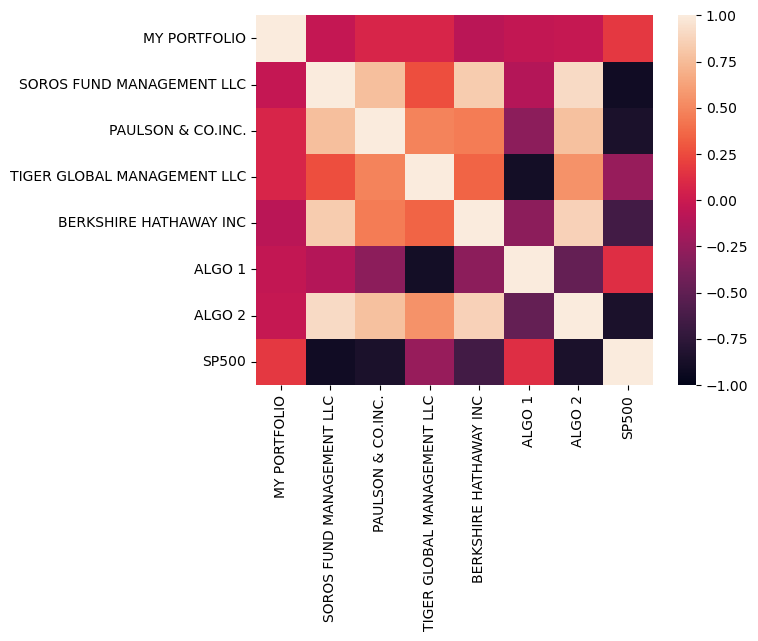

In [116]:
# Calculate and plot the correlation
custom_correlation = joined_dataframe.corr()
sns.heatmap(custom_correlation, vmin=-1, vmax=1)

In [121]:
# Calculate and plot Beta
my_covariance = joined_dataframe["MY PORTFOLIO"].cov(joined_df["SP500"])
variance = joined_dataframe["SP500"].var()
beta = my_covariance / variance
rolling_covariance = joined_dataframe["MY PORTFOLIO"].rolling(window=60).cov(joined_df["SP500"])
rolling_variance = joined_dataframe["SP500"].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 20))

KeyError: 'SP500'

In [122]:
# Calculate Annualized Sharpe Ratios
my_sharpe = (joined_dataframe.mean() * 252) / (annualized_std)
my_sharpe

MY PORTFOLIO                    -0.613547
SOROS FUND MANAGEMENT LLC       32.908189
PAULSON & CO.INC.             -152.050413
TIGER GLOBAL MANAGEMENT LLC      5.005773
BERKSHIRE HATHAWAY INC          55.535579
ALGO 1                          63.030479
ALGO 2                          48.432145
SP500                         -118.662676
dtype: float64

<Axes: >

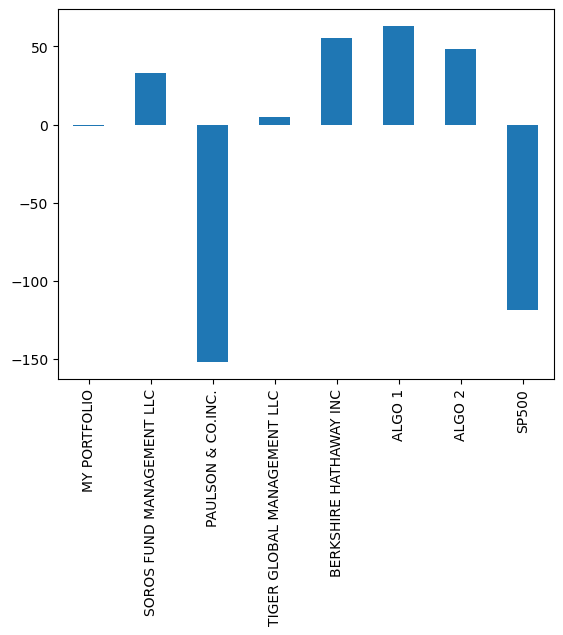

In [123]:
# Visualize the sharpe ratios as a bar plot
my_sharpe.plot(kind="bar")

In [ ]:
#How does your portfolio do?

# My portfolio performed at an average level. It was not the best however it was also not the wosrt. There is room for improvement.